## GROUP # 18
## PREDICTING THE MIDTERM ELECTION

### **INFERENTIAL MODEL**
*Michael Lee, Micah Nickerson, Daniel Olal*


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tools import eval_measures

import scipy as sp
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV


from pandas.plotting import scatter_matrix

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score #classification - cross entropy
from sklearn.metrics import r2_score #regresson - SSR/SST

#hide plotting warnings
#import warnings
#warnings.filterwarnings("ignore")

# np.random.seed(39)

In [2]:
# read the file
filepath = "data/"
house_dataset = "house_2018_demographics_by_district_with_votes.xlsx"
house_file = filepath+house_dataset

house_df = pd.read_excel(house_file)

house_df = house_df.drop(['Unnamed: 0'], axis=1) #drop Label Column

house_column_index = house_df.iloc[0:3] #extract header for easy access


# DROP DELAWARE - HAS MISSINGNESS
house_df = house_df.drop([89]) #bye Delaware

# DROP FLORIDA DISTRICTS THAT DID NOT VOTE IN 2018  (set rows 101,105,112,115)
house_df = house_df.drop([98,102,109,112]) # FL CDs 10,14,21,24

house_df = house_df.drop([0,1,2]) #drop head of dataset, header rows already extracted

#house_df.isnull().any()

print("House - By Congressional District - Database Dimensions: (%s,%s)" % house_df.shape)

display(house_column_index.head())
display(house_df.head())

display(house_df.tail())

House - By Congressional District - Database Dimensions: (430,601)


,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,Year,State,District,Election,Election,Election,Election,Election,Election,Registration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Election Year,State Code,District Number,Voting,Voting,Voting,Voting,Voting,Voting,Voting Registration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Election Year,State Abbreviation,Congressional District Number,democrat_vote,republican_vote,other_vote,totalvotes,percent_registered_who_voted,percent_eligible_who_voted,registered_voters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
3,2018,AL,1,89226,153228,163,242617,0.47902,0.457212,506486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,AL,2,86931,138879,420,226230,0.422534,0.439107,535413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,AL,3,83996,147770,149,231915,0.491539,0.433543,471814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,AL,4,46492,184255,222,230969,0.410866,0.453494,562151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,AL,5,101388,159063,222,260673,0.508846,0.487185,512283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
433,2018,WI,5,138385,225619,284,364288,0.82952,0.662516,439155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,2018,WI,6,144536,180311,218,325065,0.804804,0.594008,403906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,2018,WI,7,124307,194061,4472,322840,0.783912,0.591109,411832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2018,WI,8,119265,209410,99,328774,0.803442,0.604953,409207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,2018,WY,1,59903,127963,13379,201245,0.750914,0.464968,268000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def what_is(number):
  """
  Function to easily explain what column number is what variable
  Since variables are being referenced by number  
  Example: what_is(231)
  """
  print("Column %s - %s, %s, %s" % (number, house_column_index[int(number)][0], house_column_index[int(number)][1], house_column_index[int(number)][2]))


In [4]:
# Index of Variable Numbers
display(house_column_index.T)

,0,1,2
0,Year,Election Year,Election Year
1,State,State Code,State Abbreviation
2,District,District Number,Congressional District Number
3,Election,Voting,democrat_vote
4,Election,Voting,republican_vote
5,Election,Voting,other_vote
6,Election,Voting,totalvotes
7,Election,Voting,percent_registered_who_voted
8,Election,Voting,percent_eligible_who_voted
9,Registration,Voting Registration,registered_voters


In [5]:
for thing in range(0,557,1):
  what_is(thing)

Column 0 - Year, Election Year, Election Year
Column 1 - State, State Code, State Abbreviation
Column 2 - District, District Number, Congressional District Number
Column 3 - Election, Voting, democrat_vote
Column 4 - Election, Voting, republican_vote
Column 5 - Election, Voting, other_vote
Column 6 - Election, Voting, totalvotes
Column 7 - Election, Voting, percent_registered_who_voted
Column 8 - Election, Voting, percent_eligible_who_voted
Column 9 - Registration, Voting Registration, registered_voters
Column 10 - People, Voting Registration, percent_eligible_who_actually_register
Column 11 - Eligible_CVAP, Total_Estimated_eligibile, Total_CVAP
Column 12 - Eligible_CVAP, Not_Hispanic_Latino_CVAP, Not_Hispanic_Latino_CVAP
Column 13 - Eligible_CVAP, Am_Indian_AK_Native_CVAP, Am_Indian_AK_Native_CVAP
Column 14 - Eligible_CVAP, Asian_Alone_CVAP, Asian_Alone_CVAP
Column 15 - Eligible_CVAP, African_American_Alone_CVAP, African_American_Alone_CVAP
Column 16 - Eligible_CVAP, HI_Native_Pacific

Column 522 - nan, nan, Pillar of Fire
Column 523 - nan, nan, Presbyterian Church (USA)
Column 524 - nan, nan, Presbyterian Church in America
Column 525 - nan, nan, Primitive Baptists, Eastern District Association of
Column 526 - nan, nan, Progressive National Baptist Convention
Column 527 - nan, nan, Protestant Reformed Churches in America
Column 528 - nan, nan, Reconstructionist Judaism
Column 529 - nan, nan, Reform Judaism
Column 530 - nan, nan, Reformed Church in America
Column 531 - nan, nan, Reformed Church in the United States
Column 532 - nan, nan, Reformed Mennonite Church
Column 533 - nan, nan, Reformed Presbyterian Church of North America
Column 534 - nan, nan, Romanian Orthodox Archdiocese in Americas
Column 535 - nan, nan, Russian Orthodox Church Outside Russia
Column 536 - nan, nan, Salvation Army
Column 537 - nan, nan, Schwenkfelder Church
Column 538 - nan, nan, Serbian Orthodox Church in North America
Column 539 - nan, nan, Seventh-Day Baptist General Conference
Column 5

Predictor Matrix Building Function

In [6]:
def build_model_data(df_train, df_test, x_pred, standardize=False):
    #Predictors
    x_matrix_train = df_train[x_pred]
    x_matrix_test = df_test[x_pred]

    #Standardize predictors
    if standardize:
      scaler = StandardScaler()
      x_matrix_train = scaler.fit_transform(x_matrix_train)
      x_matrix_test = scaler.transform(x_matrix_test)

    # add a constant
    x_matrix_train = sm.add_constant(x_matrix_train)
    x_matrix_test = sm.add_constant(x_matrix_test)

    # convert all to floats
    x_matrix_train = x_matrix_train.astype(float)
    x_matrix_test = x_matrix_test.astype(float)

    return x_matrix_train, x_matrix_test

# Split into Train and Test Sets

In [7]:
house_train, house_test = train_test_split(house_df, test_size=0.20, random_state=435, shuffle=True)

#Verify Test/Train Split
print("House:")
print("Total Dataset: (%s,%s) " % house_df.shape)
print("Train Dataset: (%s,%s) " % house_train.shape)
print("Test Dataset:  (%s,%s) " % house_test.shape)

House:
Total Dataset: (430,601) 
Train Dataset: (344,601) 
Test Dataset:  (86,601) 


# Baseline Model

In [8]:
# Assign Predictor Variables

all_demo_vars = []

all_demo_vars.append('9') #total registered voters

#Not included as collinearly related
#all_demo_vars.append('11') #estimated eligible voters - 

for item in range(12,23,1): # Race by Elgible Voter (estimate)
  all_demo_vars.append(str(item))

all_demo_vars.append('24') # 18 years age or older

for item in range(26,28,1): # Demographics - Gender
  all_demo_vars.append(str(item))

for item in range(30,41,1): # Demographics - Age 
  all_demo_vars.append(str(item))

for item in range(41,42,1): # Demographics - Median Age 
  all_demo_vars.append(str(item))

# PERHAPS DROP THIS SECTION
for item in range(44,59,1): # Demographics - Race
  all_demo_vars.append(str(item))

# for item in range(60,66,1): # Place of Birth
#   all_demo_vars.append(str(item))

for item in range(67,94,1): # Ancestry - large impact on test score
  all_demo_vars.append(str(item))

for item in range(95,96,1): # Veterans
  all_demo_vars.append(str(item))

for item in range(99, 104,2): # Disability Status
  all_demo_vars.append(str(item))

# for item in range(105,112,1): # Residence - 1 Year Ago
#   all_demo_vars.append(str(item))

for item in range(115, 119,1): # Employment Status
  all_demo_vars.append(str(item))

# for item in range(122,129,1): # Commute Time
#   all_demo_vars.append(str(item))

for item in range(130,135,1): # Occupation
  all_demo_vars.append(str(item))

for item in range(135, 149,1): # Industy
  all_demo_vars.append(str(item))

# for item in range(149,154,1): # Class of Worker
#   all_demo_vars.append(str(item))

for item in range(156,157,1): # Housing Occupancy
  all_demo_vars.append(str(item))

for item in range(160,164,1): # What type of Housing are you in?
  all_demo_vars.append(str(item))

# for item in range(165,171,1): # Year Moved into Current Housing  
#   all_demo_vars.append(str(item))

for item in range(172,179,1): # House Value 
  all_demo_vars.append(str(item))

# PERHAPS DROP THIS VALUE - IF LINEARLY CORRELATED TO 172-178
# for item in range(180,181,1): # House Median Value 
#  all_demo_vars.append(str(item))

for item in range(182,183,1): # Mortgage Status 
  all_demo_vars.append(str(item))

for item in range(185,192,1): # Mortgage Cost - Selected Monthly Owner Cost 
 all_demo_vars.append(str(item))

# PERHAPS DROP THIS VALUE - IF LINEARLY CORRELATED TO 185-191
# for item in range(192,193,1): # Median Mortage Cost
#   all_demo_vars.append(str(item))

# for item in range(194,200,1): # No Mortgage - Selected Monthly Owner Cost 
#  all_demo_vars.append(str(item))

# PERHAPS DROP THIS VALUE - IF LINEARLY CORRELATED TO 185-191
for item in range(200,201,1): # Median No Mortgage - Selected Monthly Owner Cost   
  all_demo_vars.append(str(item))

# for item in range(202,209,1): # Gross Rent
#  all_demo_vars.append(str(item))

# PERHAPS DROP THIS VALUE - IF LINEARLY CORRELATED
for item in range(209,210,1): # Median Rent
  all_demo_vars.append(str(item))

for item in range(210,211,1): # No Rent Paid
  all_demo_vars.append(str(item))

for item in range(212,222,1): # Income and Benefits
  all_demo_vars.append(str(item))

# PERHAPS DROP THIS VALUE - IF LINEARLY CORRELATED
#for item in range(222,223,1): # Median Income
#  all_demo_vars.append(str(item))

# PERHAPS DROP THIS VALUE - IF LINEARLY CORRELATED
#for item in range(223,224,1): # Mean Income
#  all_demo_vars.append(str(item))

for item in range(226,229,1): # Healthcare 
  all_demo_vars.append(str(item))

# this is probably correlated to income
for item in range(231,249,1): # Poverty Level
  all_demo_vars.append(str(item))

for item in range(249,255,1): # Education
  all_demo_vars.append(str(item))

for item in range(255,263,1): # Educational Attainment
  all_demo_vars.append(str(item))

#NOT INCLUDED - LINEARLY CORRELATED
#for item in range(263,265,1): # Percent Educational Attainment
#  all_demo_vars.append(str(item))


Religions in dataset:
(percentage conversions were ignored, only total counts of population were used)

In [9]:
for church in range(398,556+1,1):
  what_is(church)

Column 398 - nan, nan, All Evangelical
Column 399 - nan, nan, All Black Protestant
Column 400 - nan, nan, All Mainline
Column 401 - nan, nan, All Orthodox
Column 402 - nan, nan, All Catholic
Column 403 - nan, nan, All Other Religion
Column 404 - nan, nan, Unclaimed
Column 405 - nan, nan, African Methodist Episcopal Church
Column 406 - nan, nan, African Methodist Episcopal Zion Church
Column 407 - nan, nan, Albanian Orthodox Diocese of America
Column 408 - nan, nan, Allegheny Wesleyan Methodist Connection
Column 409 - nan, nan, Amana Church Society
Column 410 - nan, nan, Ambassadors Amish Mennonite
Column 411 - nan, nan, American Baptist Association
Column 412 - nan, nan, American Baptist Churches in the USA
Column 413 - nan, nan, American Carpatho-Russian Orthodox Diocese
Column 414 - nan, nan, Amish Groups, undifferentiated
Column 415 - nan, nan, Antiochian Orthodox Christian Archdiocese of North America
Column 416 - nan, nan, Apostolic Christian Church of America
Column 417 - nan, na

In [10]:
# Assign Predictor Variables

# Demographics - Age 35,36,39,40
all_demo_vars = ['35','36','39','40']

for item in range(27,28,1): # Demographics - Gender - Female
  all_demo_vars.append(str(item))

for item in range(212,222,1): # Income and Benefits
  all_demo_vars.append(str(item))

for item in range(149,154,1): # Class of Worker
   all_demo_vars.append(str(item))

for item in range(172,179,1): # House Value 
  all_demo_vars.append(str(item))

for item in range(249,255,1): # Education
  all_demo_vars.append(str(item))

for item in range(255,263,1): # Educational Attainment
  all_demo_vars.append(str(item))

for item in range(398,399,1): # All Evangelical voters
  all_demo_vars.append(str(item))

for item in range(399,400,1): # All Black Protestant
  all_demo_vars.append(str(item))

for item in range(400,401,1): # All Mainline
  all_demo_vars.append(str(item))

for item in range(402,403,1): # Catholic voters
  all_demo_vars.append(str(item))

for item in range(420,421,1): # Assemblies of God
  all_demo_vars.append(str(item))

for item in range(432,433,1): # Catholic Church
  all_demo_vars.append(str(item))

for item in range(445,446,1): # LDS/ Mormon
  all_demo_vars.append(str(item))

for item in range(450,451,1): # Churches of Christ
  all_demo_vars.append(str(item))

for item in range(464,465,1): # Episcopal Church
  all_demo_vars.append(str(item))

for item in range(470,471,1): # Evangelical Lutheran
  all_demo_vars.append(str(item))

for item in range(492,493,1): # Lutheran 
  all_demo_vars.append(str(item))

for item in range(507,508,1): # Muslim
  all_demo_vars.append(str(item))

for item in range(513,514,1): # Non_denominational 
  all_demo_vars.append(str(item)) 

for item in range(523,524,1): # Presbyterian
  all_demo_vars.append(str(item))

for item in range(529,530,1): # Reform Judaism
  all_demo_vars.append(str(item))

for item in range(540,541,1): # Seventhday adventist
  all_demo_vars.append(str(item))

for item in range(541,542,1): # Southern Baptist
  all_demo_vars.append(str(item))

for item in range(550,551,1): # United Methodist
  all_demo_vars.append(str(item))

In [11]:
# BASELINE MODEL PREDICTORS
baseline_response_variable= 7

#INITIALLY SELECTED BASELINE VARIABLES
baseline_vars = [9, 27, 35, 36, 39, 40, 149, 150, 151, 153, 172, 175, 177, 178, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 249, 250, 251, 252, 253, 256, 258, 259, 260, 261, 262, 398,399,400,401,402,403]

In [12]:
x_predictors = baseline_vars

print("Selected Independent Variables: \n", x_predictors)

# Assign Dependent y variable
y_train = house_train[baseline_response_variable]
y_test = house_test[baseline_response_variable]

# HOUSE - Baseline Ordinary Least Squares Regression Model 
house_train_transformed, house_test_transformed  = build_model_data(house_train, house_test, baseline_vars, False)

#print(type(house_train_transformed))
#print(type(y_train))

# Citing https://stats.stackexchange.com/questions/352674/find-rmse-from-statsmodels-ols-results for RMSE code reference
def rmse(actual,predicted): 
  return(np.round(np.sqrt(sum(((np.array(actual)-np.array(predicted))**2))/len(actual)),3))

house_train_transformed = house_train_transformed.astype(float)
house_test_transformed = house_test_transformed.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

fitted_model_baseline = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit()
fitted_model_predictions = fitted_model_baseline.predict(house_test_transformed)

display(fitted_model_baseline.summary())

# r2_score()
print("Baseline MLR Model: TEST R^2 SCORE %0.03f" % (r2_score(y_test, fitted_model_predictions)))
print("Baseline MLR Model: TEST RMSE      %0.03f" % rmse(y_test,fitted_model_predictions))

Selected Independent Variables: 
 [9, 27, 35, 36, 39, 40, 149, 150, 151, 153, 172, 175, 177, 178, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 249, 250, 251, 252, 253, 256, 258, 259, 260, 261, 262, 398, 399, 400, 401, 402, 403]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      7   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     12.45
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           3.24e-44
Time:                        19:45:54   Log-Likelihood:                 398.70
No. Observations:                 344   AIC:                            -713.4
Df Residuals:                     302   BIC:                            -552.1
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6411      0.091      7.062      0.000       0.462       0.820
9          -9.903e-07   1.03e-07     -9.602      0.000   -1.19e-06   -7.87e-07
27          -1.56e-06   7.93e-07     -1.968      0.050   -3.12e-06    1.52e-10
35         -2.551e-06   1.13e-06     -2.261      0.024   -4.77e-06   -3.31e-07
36          2.272e-06   1.81e-06      1.257      0.210   -1.28e-06    5.83e-06
39          1.778e-07   1.56e-06      0.114      0.909   -2.89e-06    3.25e-06
40         -3.666e-06   2.34e-06     -1.565      0.119   -8.27e-06    9.43e-07
149        -1.099e-06   1.19e-06     -0.926      0.355   -3.43e-06    1.24e-06
150          7.36e-07   1.17e-06      0.627      0.531   -1.57e-06    3.05e-06
151        -9.654e-07   1.28e-06     -0.755      0.451   -3.48e-06    1.55e-06
153         2.637e-05   1.68e-05      1.569      0.118    -6.7e-06    5.94e-05
172         2.069e-06   9.77e-07      2.119      0.035    1.47e-07    3.99e-06
175         3.352e-06   9.52e-07      3.522      0.000    1.48e-06    5.22e-06
177         1.077e-06   3.98e-07      2.706      0.007    2.94e-07    1.86e-06
178         1.335e-06   4.72e-07      2.828      0.005    4.06e-07    2.26e-06
212         1.632e-06   1.74e-06      0.939      0.348   -1.79e-06    5.05e-06
213         7.826e-06   2.83e-06      2.770      0.006    2.27e-06    1.34e-05
214        -2.747e-06    2.3e-06     -1.192      0.234   -7.28e-06    1.79e-06
215         2.886e-06   2.53e-06      1.141      0.255   -2.09e-06    7.86e-06
216        -1.522e-08   2.13e-06     -0.007      0.994   -4.21e-06    4.18e-06
217         2.036e-06   1.76e-06      1.157      0.248   -1.43e-06     5.5e-06
218         2.796e-06   2.12e-06      1.321      0.187   -1.37e-06    6.96e-06
219         2.472e-06   1.67e-06      1.481      0.140   -8.13e-07    5.76e-06
220         3.754e-06   2.72e-06      1.378      0.169   -1.61e-06    9.12e-06
221         4.163e-06   1.25e-06      3.343      0.001    1.71e-06    6.61e-06
249         1.581e-06   5.78e-07      2.734      0.007    4.43e-07    2.72e-06
250        -9.058e-06   3.11e-06     -2.911      0.004   -1.52e-05   -2.93e-06
251         7.271e-07   4.14e-06      0.176      0.861   -7.41e-06    8.87e-06
252        -1.819e-06   1.12e-06     -1.632      0.104   -4.01e-06    3.75e-07
253         3.141e-06   1.99e-06      1.582      0.115   -7.66e-07    7.05e-06
256         3.836e-07   7.74e-07      0.496      0.620   -1.14e-06    1.91e-06
258         3.227e-07   5.84e-07      0.552      0.581   -8.27e-07    1.47e-06
259         1.705e-06   6.48e-07      2.631      0.009     4.3e-07    2.98e-06
260         1.628e-06   8.65e-07      1.882      0.061   -7.47e-08    3.33e-06
261         9.868e-07   6.04e-07      1.635      0.103   -2.01e-07    2.17e-06
262         1.928e-07    7.9e-07      0.244      0.807   -1.36e-06    1.75e-06
39

Baseline MLR Model: TEST R^2 SCORE 0.541
Baseline MLR Model: TEST RMSE      0.062


In [13]:
# PREDICTORS 
for value in baseline_vars:
  what_is(value)

Column 9 - Registration, Voting Registration, registered_voters
Column 27 - People, Sex and Age, Female
Column 35 - People, Sex and Age, 45 to 54 years
Column 36 - People, Sex and Age, 55 to 59 years
Column 39 - People, Sex and Age, 75 to 84 years
Column 40 - People, Sex and Age, 85 years and over
Column 149 - Workers, Class of Worker, Civilian employed population 16 years and over
Column 150 - Workers, Class of Worker, Private wage and salary workers
Column 151 - Workers, Class of Worker, Government workers
Column 153 - Workers, Class of Worker, Unpaid family workers
Column 172 - Housing, Value, Less than $50,000
Column 175 - Housing, Value, $150,000 to $199,999
Column 177 - Housing, Value, $300,000 to $499,999
Column 178 - Housing, Value, $500,000 to $999,999
Column 212 - Socioeconomic, Income and Benefits (In 2017 inflation-adjusted dollars), Less than $10,000
Column 213 - Socioeconomic, Income and Benefits (In 2017 inflation-adjusted dollars), $10,000 to $14,999
Column 214 - Socioe

# TUNED BASELINE MODEL


In [14]:
# TUNED BASELINE MODEL #2 PREDICTORS
model_2_response_variable= 7
model_2_vars = [9, 27, 39, 151, 175, 177, 178, 249, 256, 259, 261, 262]

# Removed 149 as it had collinearity (with 150)
# Removed 470 as it was overfitting to specific districts 

In [15]:
print("Selected Independent Variables: \n", model_2_vars)

# Assign Dependent y variable
y_train = house_train[model_2_response_variable]
y_test = house_test[model_2_response_variable]

# HOUSE - TUNED Ordinary Least Squares Regression Model 
house_train_transformed, house_test_transformed  = build_model_data(house_train, house_test, model_2_vars, True)

house_train_transformed = house_train_transformed.astype(float)
house_test_transformed = house_test_transformed.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

fitted_model_2 = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit()
fitted_model_2_predictions = fitted_model_2.predict(house_test_transformed)

display(fitted_model_2.summary())

# r2_score()
print("Tuned Baseline MLR Model: TEST R^2 SCORE %0.03f" % (r2_score(y_test, fitted_model_2_predictions)))
print("Tuned Baseline MLR Model: TEST RMSE      %0.03f" % rmse(y_test,fitted_model_2_predictions))

Selected Independent Variables: 
 [9, 27, 39, 151, 175, 177, 178, 249, 256, 259, 261, 262]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      7   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     29.08
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           7.55e-45
Time:                        19:45:54   Log-Likelihood:                 352.30
No. Observations:                 344   AIC:                            -678.6
Df Residuals:                     331   BIC:                            -628.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5689      0.005    119.110      0.000       0.559       0.578
x1            -0.0684      0.007     -9.435      0.000      -0.083      -0.054
x2            -0.0439      0.011     -3.968      0.000      -0.066      -0.022
x3             0.0153      0.008      2.031      0.043       0.000       0.030
x4            -0.0107      0.006     -1.837      0.067      -0.022       0.001
x5             0.0476      0.010      4.918      0.000       0.029       0.067
x6             0.0167      0.006      2.667      0.008       0.004       0.029
x7             0.0279      0.010      2.910      0.004       0.009       0.047
x8             0.0269      0.010      2.712      0.007       0.007       0.046
x9            -0.0317      0.008     -3.781      0.000      -0.048      -0.015
x10            0.0425      0.008      5.542      0.000       0.027       0.058
x11            0.0490      0.013      3.742      0.000       0.023       0.075
x12            0.0180      0.013      1.377      0.170      -0.008       0.044
==============================================================================
Omnibus:                      234.689   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3601.732
Skew:                          -2.615   Prob(JB):                         0.00
Kurtosis:                      17.964   Cond. No.                         7.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tuned Baseline MLR Model: TEST R^2 SCORE 0.592
Tuned Baseline MLR Model: TEST RMSE      0.059


In [16]:
for item in model_2_vars:
  what_is(item)

Column 9 - Registration, Voting Registration, registered_voters
Column 27 - People, Sex and Age, Female
Column 39 - People, Sex and Age, 75 to 84 years
Column 151 - Workers, Class of Worker, Government workers
Column 175 - Housing, Value, $150,000 to $199,999
Column 177 - Housing, Value, $300,000 to $499,999
Column 178 - Housing, Value, $500,000 to $999,999
Column 249 - Education, School Enrollment, Population 3 years and over enrolled in school
Column 256 - Education, Educational Attainment, Less than 9th grade
Column 259 - Education, Educational Attainment, Some college, no degree
Column 261 - Education, Educational Attainment, Bachelor's degree
Column 262 - Education, Educational Attainment, Graduate or professional degree


# CHECK SIGNIFICANCE OF **EACH** PREDICTOR

Scripts to export model results of Dependent variable (Voter Turnout) vs Each Independent Variable. 


In [17]:
def check_predictor_vs_response(predictor, check_predictors, check_response, verbose=False):
  house_train_transformed, house_test_transformed = build_model_data(house_train, house_test, predictor, False)

  y_train = house_train[check_response]
  y_test = house_test[check_response]
  y_train = y_train.astype(float)
  y_test = y_test.astype(float)

  check_variable_model = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit()
  check_variable_model_predictions = check_variable_model.predict(house_test_transformed)

  variable_pvalue = check_variable_model.pvalues.to_list()[1]
  variable_r2_train = check_variable_model.rsquared
  variable_r2_test = r2_score(y_test, check_variable_model_predictions)

  check_predictors_results.loc[predictor,:] = ([predictor, house_column_index[int(predictor)][0], house_column_index[int(predictor)][1], house_column_index[int(predictor)][2], variable_pvalue, variable_r2_train, variable_r2_test])
  
  if verbose:
    print("Column %s - %s, %s, %s - P-Value: %s - R^2 Value: %s" % (predictor, house_column_index[int(predictor)][0], house_column_index[int(predictor)][1], house_column_index[int(predictor)][2], variable_pvalue, variable_r2_test))

In [18]:
check_predictors = []
check_response = [7]

check_predictors_results = pd.DataFrame(columns=["predictor", "descr_1", "descr_2", "descr_3", "p-value", "train r^2 value", "test r^2 value"])

for item in range(3,5+1,1): #skip the y variable
  check_predictor_vs_response(item, check_predictors, check_response, False)
for item in range(9,9+1,1): #include count of registered voters
  check_predictor_vs_response(item, check_predictors, check_response, False)
for item in range(11,264+1,1): # skip business
  check_predictor_vs_response(item, check_predictors, check_response, False)
for item in range(397,556+1,1): # skip religion percentages (redundant)
  check_predictor_vs_response(item, check_predictors, check_response, False)

check_predictors_results.to_csv("each_predictors_result.csv") #export to csv file

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

Text(0.5, 0, 'Test R^2 Score (with Voter Turnout)')

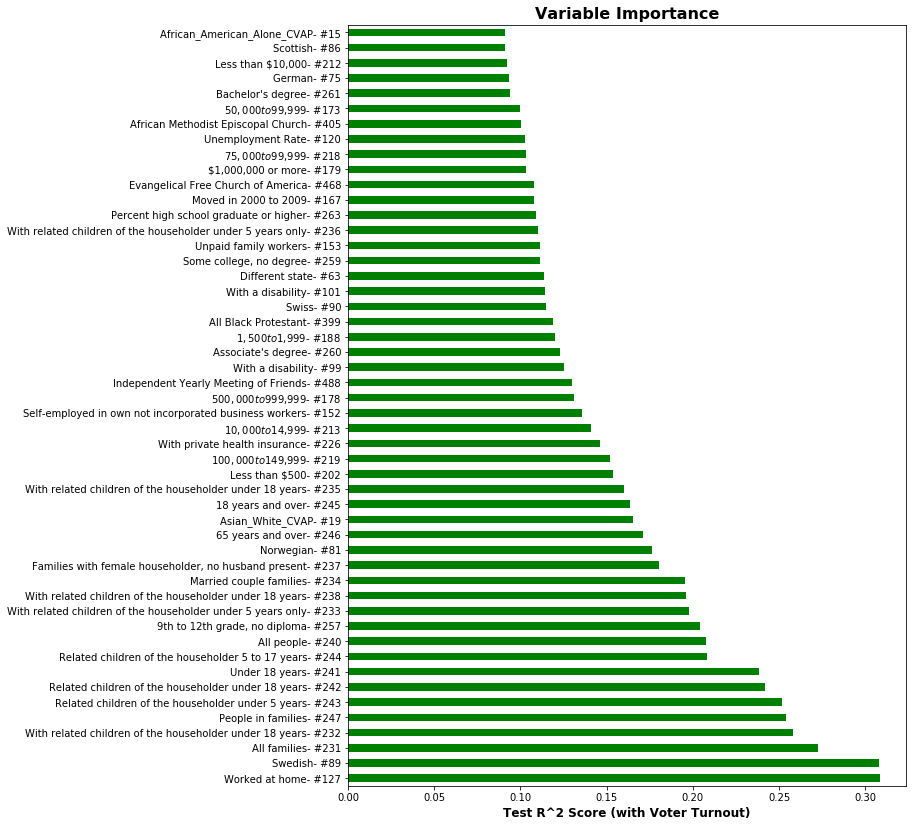

In [19]:
#Extract top predictors
count_of_predictors = 50
check_predictors_results = check_predictors_results.sort_values('test r^2 value', ascending=False)
predictor_indexes = check_predictors_results.index.values[:count_of_predictors]
top_predictors_index = []
for i in predictor_indexes:
  top_predictors_index.append(house_column_index[int(i)][2]+"- "+"#"+str(i))

top_inferential_predictors = check_predictors_results['test r^2 value'][:count_of_predictors]

fig, ax = plt.subplots(1,1, figsize=(10,14))

top_inferential_predictors.plot(kind="barh", ax=ax, color='green')
ax.set_title("Variable Importance", fontweight='bold', fontsize=16)
ax.set_yticklabels(top_predictors_index)
ax.set_xlabel("Test R^2 Score (with Voter Turnout)", fontweight='bold', fontsize=12)

# STEPWISE MODEL - BACKWARDS / FORWARDS

PER STEPWISE FUNCTION OPTIMIZATION

In [20]:
# STEPWISE BACKWARDS MODEL
model_3_response_variable= 7

# INITAL STEPWISE MODEL - VARS SELECTED BY STEPWISE BACKWARDS/FORWARDS for TRAIN
# model_3_vars = [9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 31, 35, 37, 
#                38, 39, 54, 55, 68, 69, 70, 71, 72, 75, 79, 80, 85, 86, 91, 94, 97, 100, 101, 105, 
#                106, 109, 113, 115, 120, 122, 124, 126, 130, 138, 139, 140, 142, 144, 145, 146, 147, 150, 
#                151, 152, 157, 162, 163, 167, 169, 172, 173, 175, 176, 177, 178, 180, 182, 185, 187, 194, 
#                197, 207, 209, 214, 216, 217, 223, 225, 226, 230, 231, 232, 234, 235, 238, 239, 241, 242, 
#                243, 244, 245, 247, 248, 251, 252, 257, 261, 263, 398, 399, 400, 401, 402, 403, 405, 406, 
#                408, 409, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 426, 427, 428, 
#                429, 430, 431, 432, 434, 435, 436, 437, 438, 439, 440, 442, 443, 444, 445, 446, 447, 448, 
#                450, 451, 452, 453, 454, 455, 456, 457, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 
#                470, 472, 474, 475, 476, 477, 478, 479, 481, 482, 483, 484, 486, 487, 491, 492, 493, 494, 
#                495, 496, 499, 500, 501, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 516, 
#                517, 518, 520, 521, 522, 523, 524, 525, 526, 527, 529, 530, 531, 534, 535, 536, 537, 538, 
#                539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 552, 553, 554, 555, 28, 253, 449, 98]

# TUNED STEPWISE MODEL:
model_3_vars = [72,   
                109, 122,
                223, 234,
                398, 400, 401, 403, 406, 
                412, 415, 418, 420, 422, 
                430, 435, 442, 445, 
                453, 462, 464, 
                470, 478, 479, 481, 494, 
                500, 505, 506, 507, 508, 510, 511, 512, 
                518, 523, 530, 
                549, 550, 553, 555]

In [21]:
print("Selected Independent Variables: \n", model_3_vars)

# Assign Dependent y variable
y_train = house_train[model_3_response_variable]
y_test = house_test[model_3_response_variable]

# HOUSE - STEPWISE Ordinary Least Squares Regression Model 
house_train_transformed, house_test_transformed  = build_model_data(house_train, house_test, model_3_vars, False)

house_train_transformed = house_train_transformed.astype(float)
house_test_transformed = house_test_transformed.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

fitted_model_3 = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit()
fitted_model_3_predictions = fitted_model_3.predict(house_test_transformed)

display(fitted_model_3.summary())

# r2_score()
print("Backward Stepwise MLR Model: TEST R^2 SCORE %0.03f" % (r2_score(y_test, fitted_model_3_predictions)))
print("Backward Stepwise MLR Model: TEST RMSE      %0.03f" % rmse(y_test,fitted_model_3_predictions))

Selected Independent Variables: 
 [72, 109, 122, 223, 234, 398, 400, 401, 403, 406, 412, 415, 418, 420, 422, 430, 435, 442, 445, 453, 462, 464, 470, 478, 479, 481, 494, 500, 505, 506, 507, 508, 510, 511, 512, 518, 523, 530, 549, 550, 553, 555]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      7   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     11.25
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           6.70e-41
Time:                        19:46:10   Log-Likelihood:                 390.79
No. Observations:                 344   AIC:                            -695.6
Df Residuals:                     301   BIC:                            -530.4
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4667      0.063      7.439      0.000       0.343       0.590
72          1.032e-06   3.38e-07      3.056      0.002    3.67e-07     1.7e-06
109         8.663e-07    5.6e-07      1.547      0.123   -2.35e-07    1.97e-06
122        -2.378e-07   1.49e-07     -1.599      0.111    -5.3e-07    5.48e-08
223         1.598e-06   3.18e-07      5.017      0.000    9.71e-07    2.22e-06
234           -0.0097      0.003     -3.194      0.002      -0.016      -0.004
398         9.711e-08   1.16e-07      0.837      0.403   -1.31e-07    3.25e-07
400           -0.0002   6.65e-05     -2.801      0.005      -0.000   -5.54e-05
401         2.442e-05   7.95e-06      3.071      0.002    8.77e-06    4.01e-05
403        -3.376e-06   1.26e-06     -2.677      0.008   -5.86e-06   -8.95e-07
406        -5.989e-06   2.54e-06     -2.354      0.019    -1.1e-05   -9.82e-07
412            0.0002   6.66e-05      2.784      0.006    5.44e-05       0.000
415        -5.645e-05    2.6e-05     -2.168      0.031      -0.000   -5.22e-06
418        -6.492e-05   3.26e-05     -1.992      0.047      -0.000   -7.86e-07
420         1.955e-06   1.14e-06      1.708      0.089   -2.98e-07    4.21e-06
422         1.696e-05   9.06e-06      1.871      0.062   -8.77e-07    3.48e-05
430         4.928e-05   2.52e-05      1.958      0.051   -2.53e-07    9.88e-05
435            0.0002   6.64e-05      2.788      0.006    5.45e-05       0.000
442         5.136e-06   3.13e-06      1.640      0.102   -1.03e-06    1.13e-05
445         3.733e-06   1.29e-06      2.891      0.004    1.19e-06    6.27e-06
453            0.0002   9.91e-05      2.372      0.018       4e-05       0.000
462        -2.006e-05   1.52e-05     -1.320      0.188      -5e-05    9.85e-06
464            0.0002   6.73e-05      2.762      0.006    5.34e-05       0.000
470            0.0002   6.65e-05      2.821      0.005    5.68e-05       0.000
478            0.0002   6.71e-05      2.897      0.004    6.24e-05       0.000
479            0.0002   6.79e-05      2.835      0.005    5.88e-05       0.000
481        -3.321e-05   9.58e-06     -3.467      0.001   -5.21e-05   -1.44e-05
494         -5.54e-05   2.65e-05     -2.092      0.037      -0.000   -3.28e-06
500            0.0003      0.000      2.453      0.015    5.29e-05       0.000
505            0.0001   7.26e-05      2.017      0.045    3.57e-06       0.000
506            0.0002   6.75e-05      2.787      0.006    5.53e-05       0.000
507         3.486e-06   1.46e-06      2.392      0.017    6.18e-07    6.35e-06
508            0.0002   6.89e-05      2.996      0.003    7.09e-05       0.000
510        -1.806e-05   4.32e-06     -4.176      0.000   -2.66e-05   -9.55e-06
511         4.888e-07   1.12e-06      0.435      0.664   -1.72e-06     2.7e-06
512         8.364e-06   7.42e-06      1.128      0.260   -6.23e-06     2.3e-05
51

Backward Stepwise MLR Model: TEST R^2 SCORE 0.126
Backward Stepwise MLR Model: TEST RMSE      0.086


In [22]:
# PREDICTORS 
for value in model_3_vars:
  what_is(value)

Column 72 - People, Ancestry, English
Column 109 - People, Residence 1 Year Ago, Same state
Column 122 - Workers, Commuting to Work, Car, truck, or van -- drove alone
Column 223 - Socioeconomic, Income and Benefits (In 2017 inflation-adjusted dollars), Mean household income (dollars)
Column 234 - Socioeconomic, Percentage of Families and People Whose Income in the Past 12 Months is Below the Poverty Level, Married couple families
Column 398 - nan, nan, All Evangelical
Column 400 - nan, nan, All Mainline
Column 401 - nan, nan, All Orthodox
Column 403 - nan, nan, All Other Religion
Column 406 - nan, nan, African Methodist Episcopal Zion Church
Column 412 - nan, nan, American Baptist Churches in the USA
Column 415 - nan, nan, Antiochian Orthodox Christian Archdiocese of North America
Column 418 - nan, nan, Armenian Apostolic Church of America (Catholicate of Cilicia)
Column 420 - nan, nan, Assemblies of God
Column 422 - nan, nan, Baha'i
Column 430 - nan, nan, Buddhism, Vajrayana
Column 43

# MODEL WITH INTERACTION TERMS - STEPWISE FORWARDS

Based on Variable Importance

### INTERACTION TERMS TO TEST

9 * 261 Registered Voters with Bachelors Degree

127 * 9 Registered Voters with Working from home

160 * 127 Owner occupied home with Working from home

160 * 261 Owner occupied home with income

218 * 261  Bachelors Degree with income

218 * 120  Income with Unemployment

246 * 120  Unemployment with Older people in Poverty

235 * 110 Recently moved with Many dependent children

235 * 120  Recently moved with Unemployment

37 * 9  Retirement Age and Registered Voters

9 * 120  Registered Voters and Unemployment

261 * 110 Bachelors Degree and Unemployment

In [23]:
# INTERACTION TERM MODEL:
int_term_model_response_variable = 7

# PREDICTORS
# Starting Batch = [9, 27, 37, 39, 75, 81, 86, 110, 120, 127, 151, 160, 175, 177, 178, 218, 235, 246, 249, 256, 259, 261, 262]
int_term_model_response_variable_dep_var = [9, 37, 75, 81, 86, 110, 127, 160, 256, 259, 261, 262]

# CREATE A MODEL DATA SET
house_df_augmented = house_df.copy()

# ADD INTERACTION TERMS
#Gender Female
house_df_augmented[557] = house_df_augmented[27] * house_df_augmented[9] #Female * registered voters
house_df_augmented[558] = house_df_augmented[27] * house_df_augmented[39] #Female * age over 75 to 84 
house_df_augmented[559] = house_df_augmented[27] * house_df_augmented[45] #Female * White 
house_df_augmented[560] = house_df_augmented[27] * house_df_augmented[46] #Female * Black 
house_df_augmented[561] = house_df_augmented[27] * house_df_augmented[149] #Female * Civilian employed population 16
house_df_augmented[562] = house_df_augmented[27] * house_df_augmented[151] #Female * government workers
house_df_augmented[563] = house_df_augmented[27] * house_df_augmented[175] #Female * Housing, Value, $150,000 to $199,999 
house_df_augmented[564] = house_df_augmented[27] * house_df_augmented[216] #Female * Socioeconomic, Income and Benefits 
house_df_augmented[565] = house_df_augmented[27] * house_df_augmented[256] #Female * Education, Educational Attainment, Less than 9th grade
house_df_augmented[566] = house_df_augmented[27] * house_df_augmented[450] #Female * churches of christ
house_df_augmented[567] = house_df_augmented[27] * house_df_augmented[470] #Female * evangelical lutheran 
house_df_augmented[568] = house_df_augmented[27] * house_df_augmented[529] #Female * Reform Judaism
house_df_augmented[569] = house_df_augmented[27] * house_df_augmented[540] #Female * Seventh day 

#Race White
house_df_augmented[570] = house_df_augmented[45] * house_df_augmented[9] #white * registered voters
house_df_augmented[571] = house_df_augmented[45] * house_df_augmented[39] #white * age 75 to 84
house_df_augmented[572] = house_df_augmented[45] * house_df_augmented[46] #white * Black 
house_df_augmented[573] = house_df_augmented[45] * house_df_augmented[149] #white * Civilian employed population 16
house_df_augmented[574] = house_df_augmented[45] * house_df_augmented[151] #white * government workers
house_df_augmented[575] = house_df_augmented[45] * house_df_augmented[175] #white * Housing, Value, $150,000 to $199,999 
house_df_augmented[576] = house_df_augmented[45] * house_df_augmented[216] #white * Socioeconomic, Income and Benefits 
house_df_augmented[577] = house_df_augmented[45] * house_df_augmented[256] #white * Education, Educational Attainment, Less than 9th grade
house_df_augmented[578] = house_df_augmented[45] * house_df_augmented[450] #white * churches of christ 
house_df_augmented[579] = house_df_augmented[45] * house_df_augmented[470] #white * evangelical lutheran
house_df_augmented[580] = house_df_augmented[45] * house_df_augmented[529] #white * Reform Judaism
house_df_augmented[581] = house_df_augmented[45] * house_df_augmented[540] #white * seventh day 

#Income and Benefits
house_df_augmented[582] = house_df_augmented[216] * house_df_augmented[9] #Income and Benefits * registered voters
house_df_augmented[583] = house_df_augmented[216] * house_df_augmented[39] #Income and Benefits * age 75 to 84
house_df_augmented[584] = house_df_augmented[216] * house_df_augmented[46] #Income and Benefits * Black 
house_df_augmented[585] = house_df_augmented[216] * house_df_augmented[149] #Income and Benefits * Civilian employed population 16
house_df_augmented[586] = house_df_augmented[216] * house_df_augmented[151] #Income and Benefits * government workers
house_df_augmented[587] = house_df_augmented[216] * house_df_augmented[175] #Income and Benefits * Housing, Value, $150,000 to $199,999 
house_df_augmented[588] = house_df_augmented[216] * house_df_augmented[256] #Income and Benefits * Education, Educational Attainment, Less than 9th grade
house_df_augmented[589] = house_df_augmented[216] * house_df_augmented[450] #Income and Benefits * churches of christ 
house_df_augmented[590] = house_df_augmented[216] * house_df_augmented[470] #Income and Benefits * evangelical lutheran
house_df_augmented[591] = house_df_augmented[216] * house_df_augmented[529] #Income and Benefits * Reform Judaism
house_df_augmented[592] = house_df_augmented[216] * house_df_augmented[540] #Income and Benefits * seventh day 

#Religion Lutheran
house_df_augmented[593] = house_df_augmented[470] * house_df_augmented[9] #Lutheran * registered voters
house_df_augmented[594] = house_df_augmented[470] * house_df_augmented[39] #Lutheran * age 75 to 84
house_df_augmented[595] = house_df_augmented[470] * house_df_augmented[46] #Lutheran * Black 
house_df_augmented[596] = house_df_augmented[470] * house_df_augmented[149] #Lutheran * Civilian employed population 16
house_df_augmented[597] = house_df_augmented[470] * house_df_augmented[151] #Lutheran * government workers
house_df_augmented[598] = house_df_augmented[470] * house_df_augmented[175] #Lutheran * Housing, Value, $150,000 to $199,999 
house_df_augmented[599] = house_df_augmented[470] * house_df_augmented[256] #Lutheran * Education, Educational Attainment, Less than 9th grade
house_df_augmented[600] = house_df_augmented[470] * house_df_augmented[450] #Lutheran * churches of christ 
house_df_augmented[601] = house_df_augmented[470] * house_df_augmented[529] #Lutheran * Reform Judaism
house_df_augmented[602] = house_df_augmented[470] * house_df_augmented[540] #Lutheran * seventh day 

#Housing, Value, $150,000 to $199,999
house_df_augmented[603] = house_df_augmented[175] * house_df_augmented[9] #Housing * registered voters
house_df_augmented[604] = house_df_augmented[175] * house_df_augmented[39] #Housing * age 75 to 84
house_df_augmented[605] = house_df_augmented[175] * house_df_augmented[46] #Housing * Black 
house_df_augmented[606] = house_df_augmented[175] * house_df_augmented[149] #Housing * Civilian employed population 16
house_df_augmented[607] = house_df_augmented[175] * house_df_augmented[151] #Housing * government workers
house_df_augmented[608] = house_df_augmented[175] * house_df_augmented[256] #Housing * Education, Educational Attainment, Less than 9th grade
house_df_augmented[609] = house_df_augmented[175] * house_df_augmented[450] #Housing * churches of christ 
house_df_augmented[610] = house_df_augmented[175] * house_df_augmented[529] #Housing * Reform Judaism
house_df_augmented[611] = house_df_augmented[175] * house_df_augmented[540] #Housing * seventh day 

#Key interaction terms
house_df_augmented[612] = house_df_augmented[9] * house_df_augmented[261] #9 * 261 Registered with Bachelors degree
house_df_augmented[613] = house_df_augmented[127] * house_df_augmented[9] #127 * 9 Registered with working from home
house_df_augmented[614] = house_df_augmented[160] * house_df_augmented[127] #160 * 127 Working from home with Owner occupied home 
house_df_augmented[615] = house_df_augmented[160] * house_df_augmented[261] # 160 * 261 Owner occupied home with Bachelors Degree
house_df_augmented[616] = house_df_augmented[218] * house_df_augmented[261] # 218 * 261 Income with Bachelors Degree 
house_df_augmented[617] = house_df_augmented[218] * house_df_augmented[120] #218 * 120  Income with unemployment
house_df_augmented[618] = house_df_augmented[246] * house_df_augmented[120] #246 * 120  poverty with older dependents and Unemployment 
house_df_augmented[619] = house_df_augmented[235] * house_df_augmented[110] #235 * 110 recently moved with many dependent children
house_df_augmented[620] = house_df_augmented[235] * house_df_augmented[120] #235 * 120  recently moved with unemployment
house_df_augmented[621] = house_df_augmented[37] * house_df_augmented[9] #37 * 9  Retirement Age (60 to 64 years) and Registered voters 
house_df_augmented[622] = house_df_augmented[9] * house_df_augmented[120] # 9 * 120  Registered voters and Unemployment
house_df_augmented[623] = house_df_augmented[261] * house_df_augmented[110] # 261 * 110 Bachelors Degree and unemployment

#SELECTED INTERACTION TERMS
# int_term_model_interaction_terms = list(range(557,623+1,1)) #full range
int_term_model_interaction_terms = [612, 614, 615, 621] # final selections

#INTERACTION MODEL TEST/TRAIN WITH INTERACTION TERMS
int_term_model_model_train, int_term_model_test = train_test_split(house_df_augmented, test_size=0.20, random_state=435, shuffle=True)

#MODEL VARIABLES
int_term_model_vars = int_term_model_response_variable_dep_var + int_term_model_interaction_terms

print("Selected Independent Variables: \n", int_term_model_vars)

# Assign Dependent y variable
y_train = int_term_model_model_train[int_term_model_response_variable]
y_test = int_term_model_test[int_term_model_response_variable]

# HOUSE - FINAL MODEL
house_train_transformed, house_test_transformed  = build_model_data(int_term_model_model_train, int_term_model_test, int_term_model_vars, True)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

int_term_model = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit()
int_term_model_predictions = int_term_model.predict(house_test_transformed)

display(int_term_model.summary())

# r2_score()
print("Interaction Terms MLR Model: TEST R^2 SCORE %0.03f" % (r2_score(y_test, int_term_model_predictions)))
print("Interaction Terms MLR Model: TEST RMSE      %0.03f" % rmse(y_test,int_term_model_predictions))

Selected Independent Variables: 
 [9, 37, 75, 81, 86, 110, 127, 160, 256, 259, 261, 262, 612, 614, 615, 621]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      7   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     35.15
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           2.75e-61
Time:                        19:46:10   Log-Likelihood:                 400.58
No. Observations:                 344   AIC:                            -767.2
Df Residuals:                     327   BIC:                            -701.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5689      0.004    136.224      0.000       0.561       0.577
x1            -0.1570      0.034     -4.568      0.000      -0.225      -0.089
x2            -0.0663      0.027     -2.485      0.013      -0.119      -0.014
x3             0.0229      0.007      3.389      0.001       0.010       0.036
x4             0.0241      0.006      4.338      0.000       0.013       0.035
x5             0.0301      0.007      4.479      0.000       0.017       0.043
x6            -0.0193      0.006     -3.427      0.001      -0.030      -0.008
x7             0.1045      0.041      2.573      0.011       0.025       0.184
x8             0.0111      0.020      0.564      0.573      -0.028       0.050
x9            -0.0291      0.008     -3.724      0.000      -0.044      -0.014
x10            0.0206      0.006      3.271      0.001       0.008       0.033
x11           -0.0091      0.041     -0.222      0.824      -0.089       0.071
x12            0.0244      0.011      2.216      0.027       0.003       0.046
x13           -0.0497      0.044     -1.136      0.257      -0.136       0.036
x14           -0.0991      0.048     -2.051      0.041      -0.194      -0.004
x15            0.0733      0.048      1.514      0.131      -0.022       0.168
x16            0.1565      0.052      3.024      0.003       0.055       0.258
==============================================================================
Omnibus:                      268.714   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5005.828
Skew:                          -3.106   Prob(JB):                         0.00
Kurtosis:                      20.625   Cond. No.                         51.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interaction Terms MLR Model: TEST R^2 SCORE 0.578
Interaction Terms MLR Model: TEST RMSE      0.060


In [24]:
#UNUSED MODELS (PART OF TESTING):
#model_4_vars = [86,218,127,75,9,246,37,81,261,259,160] #old clean model - using 6
#model_4_vars = [86,218,160,127,75,9,246,37,81,261,89,110,120,259] # 0.466 TEST R^2 -- removed high VIF variables 234;
#model_4_vars = [86, 75, 89, 81] # ANCESTRY PREDICTORS
#model_4_vars = [86,218,160,155,234,127,257,75,163,36,235,9,246,37,81,261,89,110,120,259] # 0.451 TEST R^2
#model_4_vars = [86,218,160,155,234,127,257,75,163,36,235,9,246] # 0.446 TEST R^2

In [25]:
for item in int_term_model_response_variable_dep_var:
  what_is(item)

Column 9 - Registration, Voting Registration, registered_voters
Column 37 - People, Sex and Age, 60 to 64 years
Column 75 - People, Ancestry, German
Column 81 - People, Ancestry, Norwegian
Column 86 - People, Ancestry, Scottish
Column 110 - People, Residence 1 Year Ago, Different state
Column 127 - Workers, Commuting to Work, Worked at home
Column 160 - Housing, Housing Tenure, Owner-occupied
Column 256 - Education, Educational Attainment, Less than 9th grade
Column 259 - Education, Educational Attainment, Some college, no degree
Column 261 - Education, Educational Attainment, Bachelor's degree
Column 262 - Education, Educational Attainment, Graduate or professional degree


# REGULARIZATION

### RIDGE REGULARIZATION

In [26]:
# STEPWISE FORWARDS MODEL:
ridge_model_response_variable = 7

# PREDICTORS
ridge_model_selected_vars = [9, 37, 127, 160, 218, 235, 259, 261]

# CREATE A MODEL DATA SET
house_df_ridge_model = house_df.copy()

# ADD INTERACTION TERMS
house_df_ridge_model[612] = house_df_ridge_model[9] * house_df_ridge_model[261] #9 * 261 registered with income
house_df_ridge_model[613] = house_df_ridge_model[127] * house_df_ridge_model[9] #127 * 9 registered with working from home
house_df_ridge_model[614] = house_df_ridge_model[160] * house_df_ridge_model[127] #160 * 127 working from home with owner occupied home 
house_df_ridge_model[615] = house_df_ridge_model[160] * house_df_ridge_model[261] # 160 * 261 owner occupied home with income
house_df_ridge_model[616] = house_df_ridge_model[218] * house_df_ridge_model[261] # 218 * 261  education with income
house_df_ridge_model[617] = house_df_ridge_model[218] * house_df_ridge_model[120] #218 * 120  education with unemployment
house_df_ridge_model[618] = house_df_ridge_model[246] * house_df_ridge_model[120] #246 * 120  poverty with older dependents and unemployment 
house_df_ridge_model[619] = house_df_ridge_model[235] * house_df_ridge_model[110] #235 * 110 recently moved with many dependent children
house_df_ridge_model[620] = house_df_ridge_model[235] * house_df_ridge_model[120] #235 * 120  recently moved with unemployment
house_df_ridge_model[621] = house_df_ridge_model[37] * house_df_ridge_model[9] #37 * 9  recently retired and registered voters 
house_df_ridge_model[622] = house_df_ridge_model[9] * house_df_ridge_model[120] # 9 * 120  registered voters and unemployment
house_df_ridge_model[623] = house_df_ridge_model[261] * house_df_ridge_model[110] # 261 * 110 education and unemployment

ridge_model_interaction_terms = []

house_df_ridge_model_train, house_df_ridge_model_test = train_test_split(house_df_ridge_model, test_size=0.20, random_state=435, shuffle=True)

ridge_model_vars = ridge_model_selected_vars + ridge_model_interaction_terms

print("Selected Independent Variables: \n", ridge_model_vars)

# Assign Dependent y variable
y_train = house_df_ridge_model_train[ridge_model_response_variable]
y_test = house_df_ridge_model_test[ridge_model_response_variable]

# HOUSE - RIDGE MODEL
house_train_transformed, house_test_transformed  = build_model_data(house_df_ridge_model_train, house_df_ridge_model_test, ridge_model_vars, True)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

alpha = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

for a in alpha:
  print("alpha =", a)
  fitted_ridge_model = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit_regularized(alpha=a, L1_wt=0.0)
  fitted_ridge_model_train_predictions = fitted_ridge_model.predict(house_train_transformed)
  fitted_ridge_model_predictions = fitted_ridge_model.predict(house_test_transformed)

  # r2_score()
  print("Ridge MLR Model: TEST R^2 SCORE %0.03f" % (r2_score(y_test, fitted_ridge_model_predictions)))
  print("Ridge MLR Model: TEST RMSE      %0.03f" % rmse(y_test,fitted_ridge_model_predictions))
  


Selected Independent Variables: 
 [9, 37, 127, 160, 218, 235, 259, 261]
alpha = 0.001
Ridge MLR Model: TEST R^2 SCORE 0.696
Ridge MLR Model: TEST RMSE      0.051
alpha = 0.01
Ridge MLR Model: TEST R^2 SCORE 0.692
Ridge MLR Model: TEST RMSE      0.051
alpha = 0.1
Ridge MLR Model: TEST R^2 SCORE 0.352
Ridge MLR Model: TEST RMSE      0.074
alpha = 0.5
Ridge MLR Model: TEST R^2 SCORE -3.751
Ridge MLR Model: TEST RMSE      0.201
alpha = 1
Ridge MLR Model: TEST R^2 SCORE -9.181
Ridge MLR Model: TEST RMSE      0.294
alpha = 5
Ridge MLR Model: TEST R^2 SCORE -26.287
Ridge MLR Model: TEST RMSE      0.481
alpha = 10
Ridge MLR Model: TEST R^2 SCORE -31.321
Ridge MLR Model: TEST RMSE      0.523


### LASSO REGULARIZATION

In [27]:
# STEPWISE FORWARDS MODEL:
lasso_model_response_variable = 7

# PREDICTORS
lasso_model_selected_vars = [9, 37, 127, 160, 218, 235, 259, 261]

# CREATE A MODEL DATA SET
house_df_lasso_model = house_df.copy()

# ADD INTERACTION TERMS
house_df_lasso_model[612] = house_df_lasso_model[9] * house_df_lasso_model[261] #9 * 261 registered with income
house_df_lasso_model[613] = house_df_lasso_model[127] * house_df_lasso_model[9] #127 * 9 registered with working from home
house_df_lasso_model[614] = house_df_lasso_model[160] * house_df_lasso_model[127] #160 * 127 working from home with owner occupied home 
house_df_lasso_model[615] = house_df_lasso_model[160] * house_df_lasso_model[261] # 160 * 261 owner occupied home with income
house_df_lasso_model[616] = house_df_lasso_model[218] * house_df_lasso_model[261] # 218 * 261  education with income
house_df_lasso_model[617] = house_df_lasso_model[218] * house_df_lasso_model[120] #218 * 120  education with unemployment
house_df_lasso_model[618] = house_df_lasso_model[246] * house_df_lasso_model[120] #246 * 120  poverty with older dependents and unemployment 
house_df_lasso_model[619] = house_df_lasso_model[235] * house_df_lasso_model[110] #235 * 110 recently moved with many dependent children
house_df_lasso_model[620] = house_df_lasso_model[235] * house_df_lasso_model[120] #235 * 120  recently moved with unemployment
house_df_lasso_model[621] = house_df_lasso_model[37] * house_df_lasso_model[9] #37 * 9  recently retired and registered voters 
house_df_lasso_model[622] = house_df_lasso_model[9] * house_df_lasso_model[120] # 9 * 120  registered voters and unemployment
house_df_lasso_model[623] = house_df_lasso_model[261] * house_df_lasso_model[110] # 261 * 110 education and unemployment

lasso_model_interaction_terms = []

house_df_lasso_model_train, house_df_lasso_model_test = train_test_split(house_df_lasso_model, test_size=0.20, random_state=435, shuffle=True)

lasso_model_vars = lasso_model_selected_vars + lasso_model_interaction_terms

print("Selected Independent Variables: \n", lasso_model_vars)

# Assign Dependent y variable
y_train = house_df_lasso_model_train[lasso_model_response_variable]
y_test = house_df_lasso_model_test[lasso_model_response_variable]

# HOUSE - LASSO MODEL
house_train_transformed, house_test_transformed  = build_model_data(house_df_lasso_model_train, house_df_lasso_model_test, lasso_model_vars, True)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

alpha = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

for a in alpha:
  print("alpha =", a)
  fitted_lasso_model = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit_regularized(alpha=a, L1_wt=1.0)
  fitted_lasso_model_train_predictions = fitted_lasso_model.predict(house_train_transformed)
  fitted_lasso_model_predictions = fitted_lasso_model.predict(house_test_transformed)

  # r2_score()
  print("Lasso MLR Model: TEST R^2 SCORE %0.03f" % (r2_score(y_test, fitted_lasso_model_predictions)))
  print("Lasso MLR Model: TEST RMSE      %0.03f" % rmse(y_test,fitted_lasso_model_predictions))


Selected Independent Variables: 
 [9, 37, 127, 160, 218, 235, 259, 261]
alpha = 0.001
Lasso MLR Model: TEST R^2 SCORE 0.703
Lasso MLR Model: TEST RMSE      0.050
alpha = 0.01
Lasso MLR Model: TEST R^2 SCORE 0.658
Lasso MLR Model: TEST RMSE      0.054
alpha = 0.1
Lasso MLR Model: TEST R^2 SCORE -1.136
Lasso MLR Model: TEST RMSE      0.135
alpha = 0.5
Lasso MLR Model: TEST R^2 SCORE -29.267
Lasso MLR Model: TEST RMSE      0.507
alpha = 1
Lasso MLR Model: TEST R^2 SCORE -37.921
Lasso MLR Model: TEST RMSE      0.574
alpha = 5
Lasso MLR Model: TEST R^2 SCORE -37.921
Lasso MLR Model: TEST RMSE      0.574
alpha = 10
Lasso MLR Model: TEST R^2 SCORE -37.921
Lasso MLR Model: TEST RMSE      0.574


# Final Model

In [28]:
# STEPWISE FORWARDS MODEL:
final_model_response_variable = 7

# PREDICTORS
final_model_selected_vars = [9, 37, 127, 160, 218, 235, 259, 261]

# CREATE A MODEL DATA SET
house_df_final_model = house_df.copy()

# ADD INTERACTION TERMS
house_df_final_model[612] = house_df_final_model[9] * house_df_final_model[261] #9 * 261 registered with income
house_df_final_model[613] = house_df_final_model[127] * house_df_final_model[9] #127 * 9 registered with working from home
house_df_final_model[614] = house_df_final_model[160] * house_df_final_model[127] #160 * 127 working from home with owner occupied home 
house_df_final_model[615] = house_df_final_model[160] * house_df_final_model[261] # 160 * 261 owner occupied home with income
house_df_final_model[616] = house_df_final_model[218] * house_df_final_model[261] # 218 * 261  education with income
house_df_final_model[617] = house_df_final_model[218] * house_df_final_model[120] #218 * 120  education with unemployment
house_df_final_model[618] = house_df_final_model[246] * house_df_final_model[120] #246 * 120  poverty with older dependents and unemployment 
house_df_final_model[619] = house_df_final_model[235] * house_df_final_model[110] #235 * 110 recently moved with many dependent children
house_df_final_model[620] = house_df_final_model[235] * house_df_final_model[120] #235 * 120  recently moved with unemployment
house_df_final_model[621] = house_df_final_model[37] * house_df_final_model[9] #37 * 9  recently retired and registered voters 
house_df_final_model[622] = house_df_final_model[9] * house_df_final_model[120] # 9 * 120  registered voters and unemployment
house_df_final_model[623] = house_df_final_model[261] * house_df_final_model[110] # 261 * 110 education and unemployment

final_model_interaction_terms = []
#435
house_df_final_model_train, house_df_final_model_test = train_test_split(house_df_final_model, test_size=0.20, random_state=435, shuffle=True)

final_model_vars = final_model_selected_vars + final_model_interaction_terms

print("Selected Independent Variables: \n", final_model_vars)

# Assign Dependent y variable
y_train = house_df_final_model_train[final_model_response_variable]
y_test = house_df_final_model_test[final_model_response_variable]

# HOUSE - FINAL MODEL
house_train_transformed, house_test_transformed  = build_model_data(house_df_final_model_train, house_df_final_model_test, final_model_vars, True)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

fitted_final_model = OLS(endog= y_train, exog=house_train_transformed, hasconst=True).fit()
fitted_final_model_predictions = fitted_final_model.predict(house_test_transformed)

display(fitted_final_model.summary())

# r2_score()
print("Final MLR Model: TEST R^2 SCORE %0.03f" % (r2_score(y_test, fitted_final_model_predictions)))
print("Final MLR Model: TEST RMSE      %0.03f" % rmse(y_test,fitted_final_model_predictions))

Selected Independent Variables: 
 [9, 37, 127, 160, 218, 235, 259, 261]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      7   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     42.48
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.20e-46
Time:                        19:46:11   Log-Likelihood:                 348.94
No. Observations:                 344   AIC:                            -679.9
Df Residuals:                     335   BIC:                            -645.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5689      0.005    118.663      0.000       0.559       0.578
x1            -0.0805      0.007    -12.000      0.000      -0.094      -0.067
x2             0.0077      0.007      1.050      0.295      -0.007       0.022
x3             0.0305      0.009      3.334      0.001       0.013       0.049
x4             0.0502      0.009      5.884      0.000       0.033       0.067
x5             0.0072      0.007      0.970      0.333      -0.007       0.022
x6            -0.0246      0.007     -3.410      0.001      -0.039      -0.010
x7             0.0131      0.006      2.139      0.033       0.001       0.025
x8             0.0168      0.010      1.658      0.098      -0.003       0.037
==============================================================================
Omnibus:                      229.918   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3515.021
Skew:                          -2.539   Prob(JB):                         0.00
Kurtosis:                      17.814   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final MLR Model: TEST R^2 SCORE 0.696
Final MLR Model: TEST RMSE      0.051


In [29]:
# PREDICTORS 
for value in final_model_selected_vars:
  what_is(value) 

Column 9 - Registration, Voting Registration, registered_voters
Column 37 - People, Sex and Age, 60 to 64 years
Column 127 - Workers, Commuting to Work, Worked at home
Column 160 - Housing, Housing Tenure, Owner-occupied
Column 218 - Socioeconomic, Income and Benefits (In 2017 inflation-adjusted dollars), $75,000 to $99,999
Column 235 - Socioeconomic, Percentage of Families and People Whose Income in the Past 12 Months is Below the Poverty Level, With related children of the householder under 18 years
Column 259 - Education, Educational Attainment, Some college, no degree
Column 261 - Education, Educational Attainment, Bachelor's degree


### Pair Plots for Significant Predictors


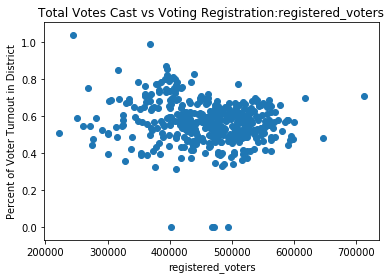

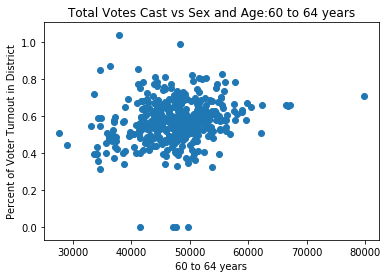

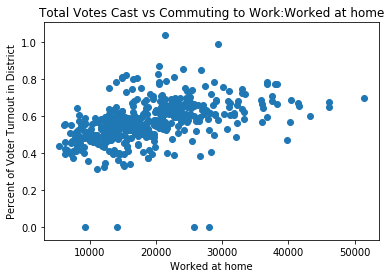

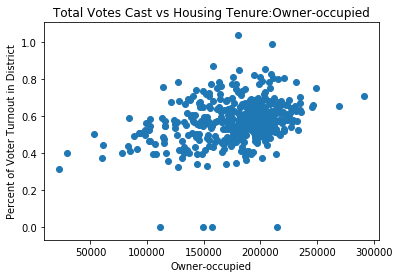

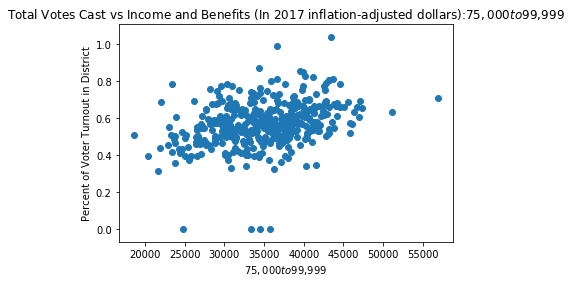

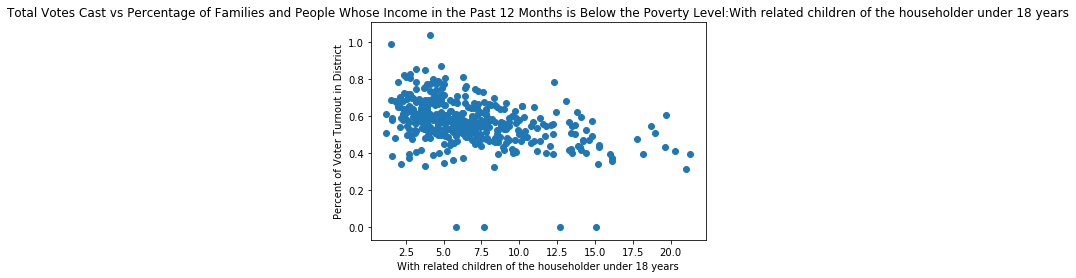

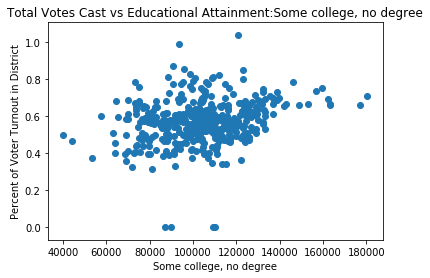

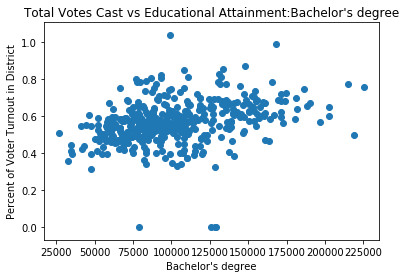

In [30]:
#plot relationship between significant predictors

## IN ORDER OF SIGNIFICANCE / CORRELATION (MOST TO LEAST):
for predictah in final_model_selected_vars:
  plt.scatter(house_df[predictah], house_df[7])
  plt.ylabel("Percent of Voter Turnout in District")
  plt.xlabel(house_column_index[int(predictah)][2])
  plt.title("Total Votes Cast vs %s:%s" % (house_column_index[int(predictah)][1], house_column_index[int(predictah)][2]))
  plt.show()

#Final Model Predictions

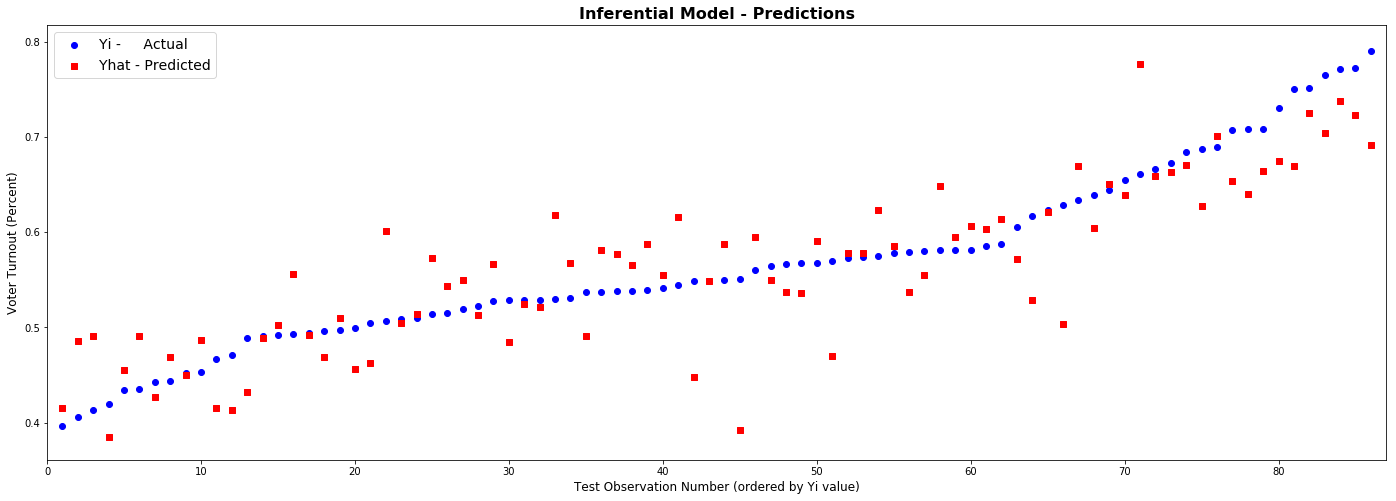

In [31]:
# Plotting Model Predictions

districts =  [40, 431, 328, 155,  63,  10, 256,  82,  49, 148,  86, 374, 261,
            258, 276, 236, 202, 277, 139, 348, 418, 108, 280, 121, 254, 395,
             73, 129, 271,  25, 207,  19,  52, 335, 246, 283, 354, 356, 364,
             29,  23, 192, 357,   7, 285, 173, 329, 324, 226, 359, 123, 286,
             72, 181,  20, 244, 386, 379, 160, 234, 240, 410, 210, 419,  31,
            341, 349, 437,  14, 281, 388, 212, 146, 235, 200, 380, 360,  74,
              5,  92, 365, 227, 159,  54, 198, 401]

predictions_df = pd.DataFrame(districts, columns=["district"])
predictions_df['yi'] = list(y_test)
predictions_df['yhat'] = fitted_final_model_predictions
predictions_df = predictions_df.sort_values('yi')
district_list = list(range(1,87,1))

yis = predictions_df['yi']
yhats = predictions_df['yhat']

plt.figure(figsize=(24,8))

plt.scatter(district_list,predictions_df.yi, color="blue",label="Yi -     Actual")
plt.scatter(district_list,predictions_df.yhat, marker="s", color="red", label="Yhat - Predicted")
plt.xlabel("Test Observation Number (ordered by Yi value)", fontsize=12)
plt.ylabel("Voter Turnout (Percent)", fontsize=12)
plt.title("Inferential Model - Predictions", fontweight='bold', fontsize=16)
plt.xlim(0,87)
plt.legend(fontsize=14)
plt.show()


# District turn_over and Voter Turnout

Welsh t-test and boxplot to determine if voter turnout effects turn_over

(if voter turnout is different for districts with turn_over and districts that do not turn_over)

**Turnover:** When a district changes party in an election AWAY from the incumbent presidents party (and the district incumbent).
*i.e. A republican district turns democrat while a republican is president.*

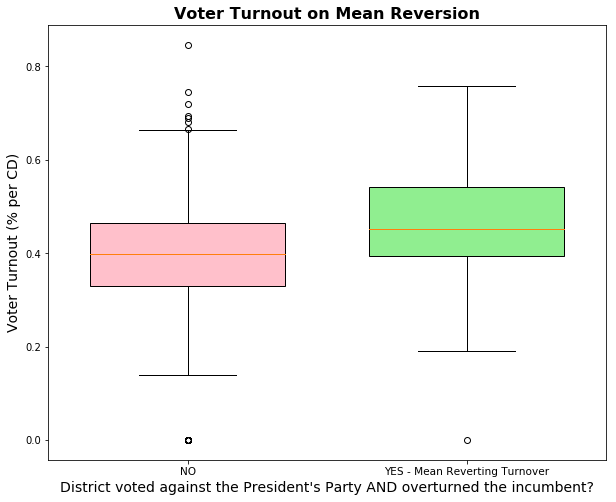

Ttest_indResult(statistic=-8.084509530440075, pvalue=1.0254976107216847e-15)

0.39743903912784245
0.46204955264795877


In [32]:
# load dataset

# read the file
house_2000_2016_train_df = pd.read_csv("data/TRAIN_midterm_house_2002-2016_results.csv")
house_2018_test_df = pd.read_csv("data/TEST_midterm_house_2018_results.csv")
house_2000_2018_df = pd.concat([house_2000_2016_train_df, house_2018_test_df]) 

#Voter Turnout group_by Turn_over
voter_turnout_no_turnovers = house_2000_2018_df.loc[house_2000_2018_df['6D'] == '0']['8'].astype(float) #force datatype as float
voter_turnout_turnovers = house_2000_2018_df.loc[house_2000_2018_df['6D'] == '1']['8'].astype(float) #mean reverting districts
 
#Boxplot
voter_turn_boxplot = [voter_turnout_no_turnovers, voter_turnout_turnovers]

f, ax = plt.subplots(figsize=(10,8))
box_plot_data=voter_turn_boxplot
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=["NO","YES - Mean Reverting Turnover"], widths = 0.7)
plt.xlabel("District voted against the President's Party AND overturned the incumbent?", fontsize=14)
plt.xticks(fontsize=10.5)
plt.ylabel('Voter Turnout (% per CD)', fontsize=14)
colors = ['pink', 'lightgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Voter Turnout on Mean Reversion', fontsize=16, fontweight='bold')
plt.show()
print("")

# Welsh two sided t-test
display(stats.ttest_ind(voter_turnout_no_turnovers,voter_turnout_turnovers))

#means
print(voter_turnout_no_turnovers.mean())
print(voter_turnout_turnovers.mean())


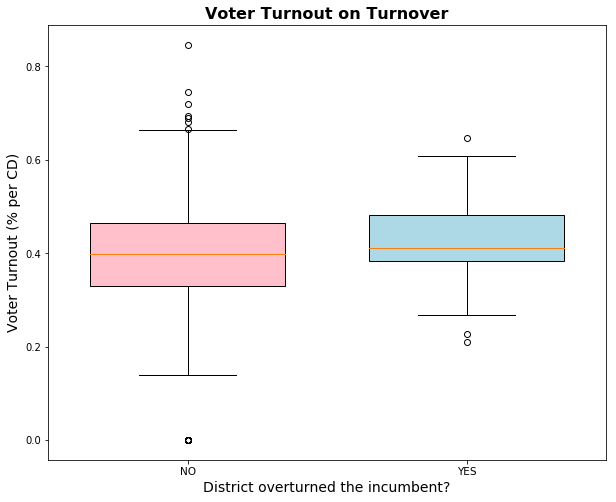

Ttest_indResult(statistic=-1.2549966152253582, pvalue=0.20962831793750436)

0.39700227908978347
0.41808394043902447


In [33]:
#Voter Turnout group_by District Turnover
voter_turnout_no_change = house_2000_2018_df.loc[house_2000_2018_df['6E'] == '0']['8'].astype(float) #force datatype as float
voter_turnout_change = house_2000_2018_df.loc[house_2000_2018_df['6E'] == '1']
voter_turnout_change = voter_turnout_change.loc[voter_turnout_change['6D'] == '0']['8'].astype(float) #not including mean reverting districts

#Boxplot
voter_turn_boxplot = [voter_turnout_no_change, voter_turnout_change]

f, ax = plt.subplots(figsize=(10,8))
box_plot_data=voter_turn_boxplot
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=["NO","YES"], widths = 0.7)
plt.xlabel("District overturned the incumbent?", fontsize=14)
plt.xticks(fontsize=10.5)
plt.ylabel('Voter Turnout (% per CD)', fontsize=14)
colors = ['pink', 'lightblue']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Voter Turnout on Turnover', fontsize=16, fontweight='bold')
plt.show()
print("")

# Welsh two sided t-test
display(stats.ttest_ind(voter_turnout_no_change,voter_turnout_change))

#means
print(voter_turnout_no_change.mean())
print(voter_turnout_change.mean())

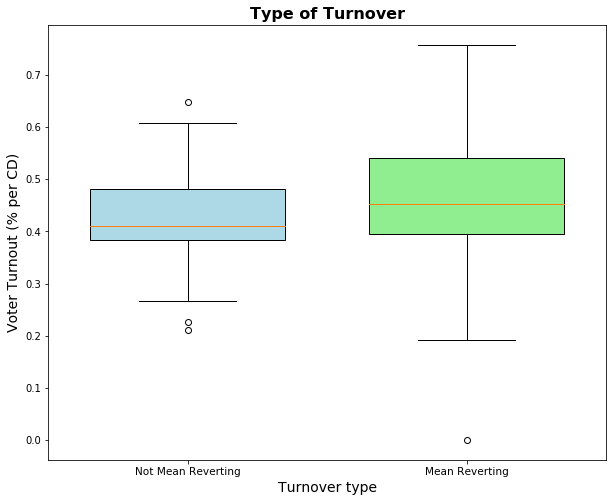

Ttest_indResult(statistic=-2.3756166742186666, pvalue=0.018322743821963364)

0.41808394043902447
0.46204955264795877


In [34]:
#Voter Turnout group_by District Turnover
voter_turnout_change = house_2000_2018_df.loc[house_2000_2018_df['6E'] == '1']
voter_turnout_change = voter_turnout_change.loc[voter_turnout_change['6D'] == '0']['8'].astype(float) #not including mean reverting districts

#Boxplot
voter_turn_boxplot = [voter_turnout_change,voter_turnout_turnovers]

f, ax = plt.subplots(figsize=(10,8))
box_plot_data=voter_turn_boxplot
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=["Not Mean Reverting","Mean Reverting"], widths = 0.7)
plt.xlabel("Turnover type", fontsize=14)
plt.xticks(fontsize=10.5)
plt.ylabel('Voter Turnout (% per CD)', fontsize=14)
colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Type of Turnover', fontsize=16, fontweight='bold')
plt.show()
print("")

# Welsh two sided t-test
display(stats.ttest_ind(voter_turnout_change, voter_turnout_turnovers))

#means
print(voter_turnout_change.mean())
print(voter_turnout_turnovers.mean())

T-tests and boxplots indicate, that Mean Reverting districts vote at a higher rate than both districts that did not change party, and districts that changed party in a non-mean reverting way.


This supports the idea that voter turnout is a key part of mean reversion.